<a href="https://colab.research.google.com/github/Joza93/64061_Joza/blob/main/AssignmentJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_labels[0]


1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="adam", 
              loss="mean_squared_error",
              metrics=["accuracy"])

Validate the approach 

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 5s 51ms/step - loss: 0.1221 - accuracy: 0.8333 - val_loss: 0.0918 - val_accuracy: 0.8773
Epoch 2/20
59/59 [==============================] - 3s 51ms/step - loss: 0.0495 - accuracy: 0.9366 - val_loss: 0.0905 - val_accuracy: 0.8784
Epoch 3/20
59/59 [==============================] - 2s 39ms/step - loss: 0.0312 - accuracy: 0.9636 - val_loss: 0.0999 - val_accuracy: 0.8721
Epoch 4/20
59/59 [==============================] - 2s 30ms/step - loss: 0.0229 - accuracy: 0.9738 - val_loss: 0.1050 - val_accuracy: 0.8724
Epoch 5/20
59/59 [==============================] - 2s 31ms/step - loss: 0.0187 - accuracy: 0.9789 - val_loss: 0.1126 - val_accuracy: 0.8672
Epoch 6/20
59/59 [==============================] - 2s 41ms/step - loss: 0.0168 - accuracy: 0.9813 - val_loss: 0.1176 - val_accuracy: 0.8635
Epoch 7/20
59/59 [==============================] - 2s 31ms/step - loss: 0.0173 - accuracy: 0.9807 - val_loss: 0.1187 - val_accuracy: 0.8662
Epoch 8/20
59

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

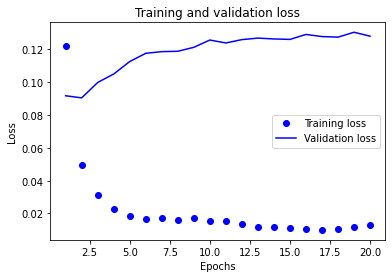

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

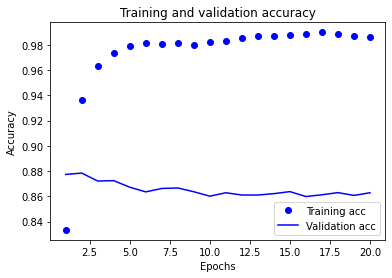

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.1396 - accuracy: 0.8504


In [18]:
results

[0.13963362574577332, 0.8504400253295898]

Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 4s 44ms/step - loss: 1.4771 - accuracy: 0.7899 - val_loss: 1.1444 - val_accuracy: 0.8815
Epoch 2/20
59/59 [==============================] - 2s 34ms/step - loss: 0.9187 - accuracy: 0.9067 - val_loss: 0.7037 - val_accuracy: 0.8885
Epoch 3/20
59/59 [==============================] - 1s 25ms/step - loss: 0.5217 - accuracy: 0.9328 - val_loss: 0.3894 - val_accuracy: 0.8867
Epoch 4/20
59/59 [==============================] - 1s 24ms/step - loss: 0.2571 - accuracy: 0.9461 - val_loss: 0.1966 - val_accuracy: 0.8834
Epoch 5/20
59/59 [==============================] - 2s 30ms/step - loss: 0.1212 - accuracy: 0.9573 - val_loss: 0.1295 - val_accuracy: 0.8880
Epoch 6/20
59/59 [==============================] - 1s 25ms/step - loss: 0.0842 - accuracy: 0.9641 - val_loss: 0.1177 - val_accuracy: 0.8860
Epoch 7/20
59/59 [==============================] - 1s 25ms/step - loss: 0.0713 - accuracy: 0.9685 - val_loss: 0.1138 - val_accuracy: 0.8852
Epoch 8/20
59

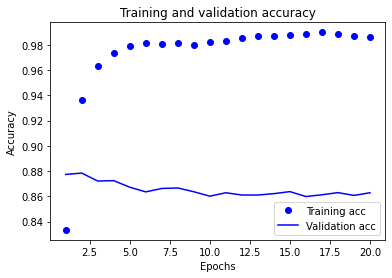

782/782 [==============================] - 3s 4ms/step - loss: 0.1256 - accuracy: 0.8600


[0.12557224929332733, 0.8599600195884705]

In [19]:
# Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 3 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh')) 
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(x_test, y_test)
results

**Summary**:
* In order for our neural network to
function properly, we first acquired the necessary libraries. TensorFlow has better implementation and support than other deep learning libraries like Pytorch, according to my research and study

List of imports are:

from tensorflow import keras
from tensorflow leras import layers from keras.layers import Dense from kent.layers import Dropout



* we imported keras, keras.layers, Dense and Dropouts. Each of its own has a significant importance in its implementation. Keras is the high-level API of TensorFlow 2: an approachable, highly productive interface for solving machine learning problems, with a focus on modern deep learning. 
The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. 
Dense represent the number of hidden units in the neural network.
Dropout: The significance of dropout is taking a bunch of inputs or hidden layer input, random remove the connections. model = keras.Sequential() ----- Sequential model is the simplest mode of keras, which is stack up the layers in the sequences. model.add(Dense(32,activation='tanh')) Stacking layers is easy using the. add function. Also 32 represents the No. of hidden units and we use the activation function tanh. 

Contents of neural networks:



1. Input Layer: Where we provide our input to it. – here we provide vector representation of IMDB data
2. Hidden layers: It contains the number of dense units, and we can stack up as many layers as we want depending on the requirement.
3. Output layer – output layer, Preferably the output layer has 1 dense unit.

Here in this task we have tried to implement three layered approach as per the requirement given in the assignment. model = keras.Sequential([ layers.Dense(32, activation="tanh"), layers.Dense(32, activation="tanh"), layers.Dense(32, activation="tanh"), layers.Dense(1, activation="sigmoid") ])

The above code model initialized as sequential. And we stack up three layers with 32 dense units and tanh activation function. In the task, I implemented tanh instead of relu as suggested in the assignment. model.compile(optimizer="adagrad", loss="mean_squared_error", metrics=["accuracy"]) The above piece of code uses an optimizer adagrad with mse loss. I still have a doubt here initially IMBD data uses a loss of binary_crossentrophy which is a probabilistic loss and what if we changed the regression loss. More information will be available in 2nd reference link. Optimizers are very important to minimize the error and we have different techniques/optimizers. For example, adam is considered as good optimizers among the different approaches. In this task, I used adagrad. More details about optimizers will be explained in the 3nd reference link.  We split the data into training and validation part and the code below shows the split

x_val = x_train[:10000] partial_x_train = x_train[10000:] y_val = y_train[:10000] partial_y_train = y_train[10000:] Training the data history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=256, validation_data=(x_val, y_val)) The above line of code represent it will train the neural network with 20 epoch and batch size of 256 and parallely it compare with validation data. I used L1 and L2 regularizers but it does not gives much impact on the total validation accuracy.









**Conclusions**
1. Neural network designed with 3 layers
2. Activation functions tanh is used instead of relu
3. Optimizer adam is used instead of rmsprop
4. L1 & L2 regularizers are used
4. Dropout layer with 0.5 is used. That means we are dropping 50 percent of inputs during the training.